# Problem 1

In [1]:
using JuMP, HiGHS, ECOS, SCS

### Function to solve Problem 1 using a specified solver

In [4]:
function solve_with_solver(solver)
    m = Model(solver)
    @variable(m, x1 >= 0)
    @variable(m, x2 >= 0)

    @objective(m, Max, 4x1 + 5x2)

    @constraint(m, 2x1 + 3x2 <= 12)
    @constraint(m, x1 + 4x2 <= 10)
    @constraint(m, 3x1 + x2 <= 9)

    # Solve the model
    @time optimize!(m)

    # Check if a solution is found
    if termination_status(m) == MOI.OPTIMAL || termination_status(m) == MOI.LOCALLY_SOLVED
        println("Solver: ", solver)
        println("Optimal value: ", objective_value(m))
        println("x1: ", value(x1), ", x2: ", value(x2))
    else
        println("Solver: ", solver, " - No optimal solution found.")
    end
    println("------------------------------")
end

solve_with_solver (generic function with 1 method)

### Solving the Problem with different solvers

In [6]:
println("Solving with HiGHS:")
solve_with_solver(HiGHS.Optimizer)

println("Solving with ECOS:")
solve_with_solver(ECOS.Optimizer)

println("Solving with SCS:")
solve_with_solver(SCS.Optimizer)

Solving with HiGHS:
Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 4e+00]
  Cost   [4e+00, 5e+00]
  Bound  [0e+00, 0e+00]
  RHS    [9e+00, 1e+01]
Presolving model
3 rows, 2 cols, 6 nonzeros  0s
3 rows, 2 cols, 6 nonzeros  0s
Presolve : Reductions: rows 3(-0); columns 2(-0); elements 6(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -8.9999895867e+00 Ph1: 3(14); Du: 2(8.99999) 0s
          3     1.9000000000e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 3
Objective value     :  1.9000000000e+01
HiGHS run time      :          0.00
  0.001307 seconds (179 allocations: 12.062 KiB)
Solver: HiGHS.Optimizer
Optimal value: 19.000000000000004
x1: 2.3636363636363633, x2: 1.90909090909091
------------------------------
Solving with ECOS:
  0.000420 seconds (647 alloc

#### HiGHS is the most accurate solver for this specific problem based on the results provided. It returns a value that is closest to the theoretical optimal value of 19, with minimal numerical deviation.

#### HiGHS is the fastest solver with a runtime of approximately 0.002564 seconds for it's first iteration, significantly quicker than both ECOS and SCS.

#### In the first iteration of, I speculate it takes time for loading the libraries and performing calculation. After the first iteration, most of the steps are cached and it doesn't take long to compute the results after.

#### Algorithm efficiency, problem complexity and size, and optimization could be a few factors that might contribute to the solver speed differences. 

# Problem 2

### Part (a) Formulating a Linear Model

#### Decision Variables:
#### x : Number of additional acres of land used for the runway.
#### y : Number of additional 10 square feet units used for expanding the terminal.

#### Objective Function:
#### Maximize Profit: Profit comes from added flights and additional passengers.
#### Maximize: Z = 5000x + 5000y

#### Constraints:
#### Labor Constraint: Each acre needs 100 hours, and each 10 sq ft needs 10 hours. Total available hours are 1000. (100x + 10y ≤ 1000)
#### Material Constraint: Each acre needs 500 pounds of material, and each 10 sq ft needs 300 pounds. Total available material is 3000 pounds. (500x + 300y ≤ 3000)
#### Flight Addition Requirement: At least 15 new flights must be added. (5x ≥ 15, x ≥ 3)

In [2]:
using JuMP, GLPK

m = Model(GLPK.Optimizer)
@variable(m, x >= 3)
@variable(m, y >= 0)

@objective(m, Max, 5000x + 5000y)

@constraint(m, 100x + 10y <= 1000) 
@constraint(m, 500x + 300y <= 3000)

optimize!(m)
println("Optimal acres for runway (x): ", value(x))
println("Optimal 10 sq ft increments for terminal (y): ", value(y))
println("Maximum Profit: \$", objective_value(m))

Optimal acres for runway (x): 3.0
Optimal 10 sq ft increments for terminal (y): 5.0
Maximum Profit: $40000.0


### Part (b) Coding the model with parameters

In [3]:
# parameters
labor_per_acre = 100
labor_per_10sqft = 10
material_per_acre = 500
material_per_10sqft = 300
total_labor = 1000
total_material = 3000
profit_per_flight = 1000
flights_per_acre = 5
passengers_per_10sqft = 100
profit_per_passenger = 50

# model
m = Model(GLPK.Optimizer)
@variable(m, x >= 3) 
@variable(m, y >= 0)  

@objective(m, Max, (flights_per_acre * profit_per_flight * x) + (passengers_per_10sqft * profit_per_passenger * y))

@constraint(m, labor_per_acre*x + labor_per_10sqft*y <= total_labor)
@constraint(m, material_per_acre*x + material_per_10sqft*y <= total_material)

optimize!(m)
println("Optimal acres for runway (x): ", value(x))
println("Optimal 10 sq ft increments for terminal (y): ", value(y))
println("Maximum Profit: \$", objective_value(m))

Optimal acres for runway (x): 3.0
Optimal 10 sq ft increments for terminal (y): 5.0
Maximum Profit: $40000.0


### Part (c) Graphical Solution

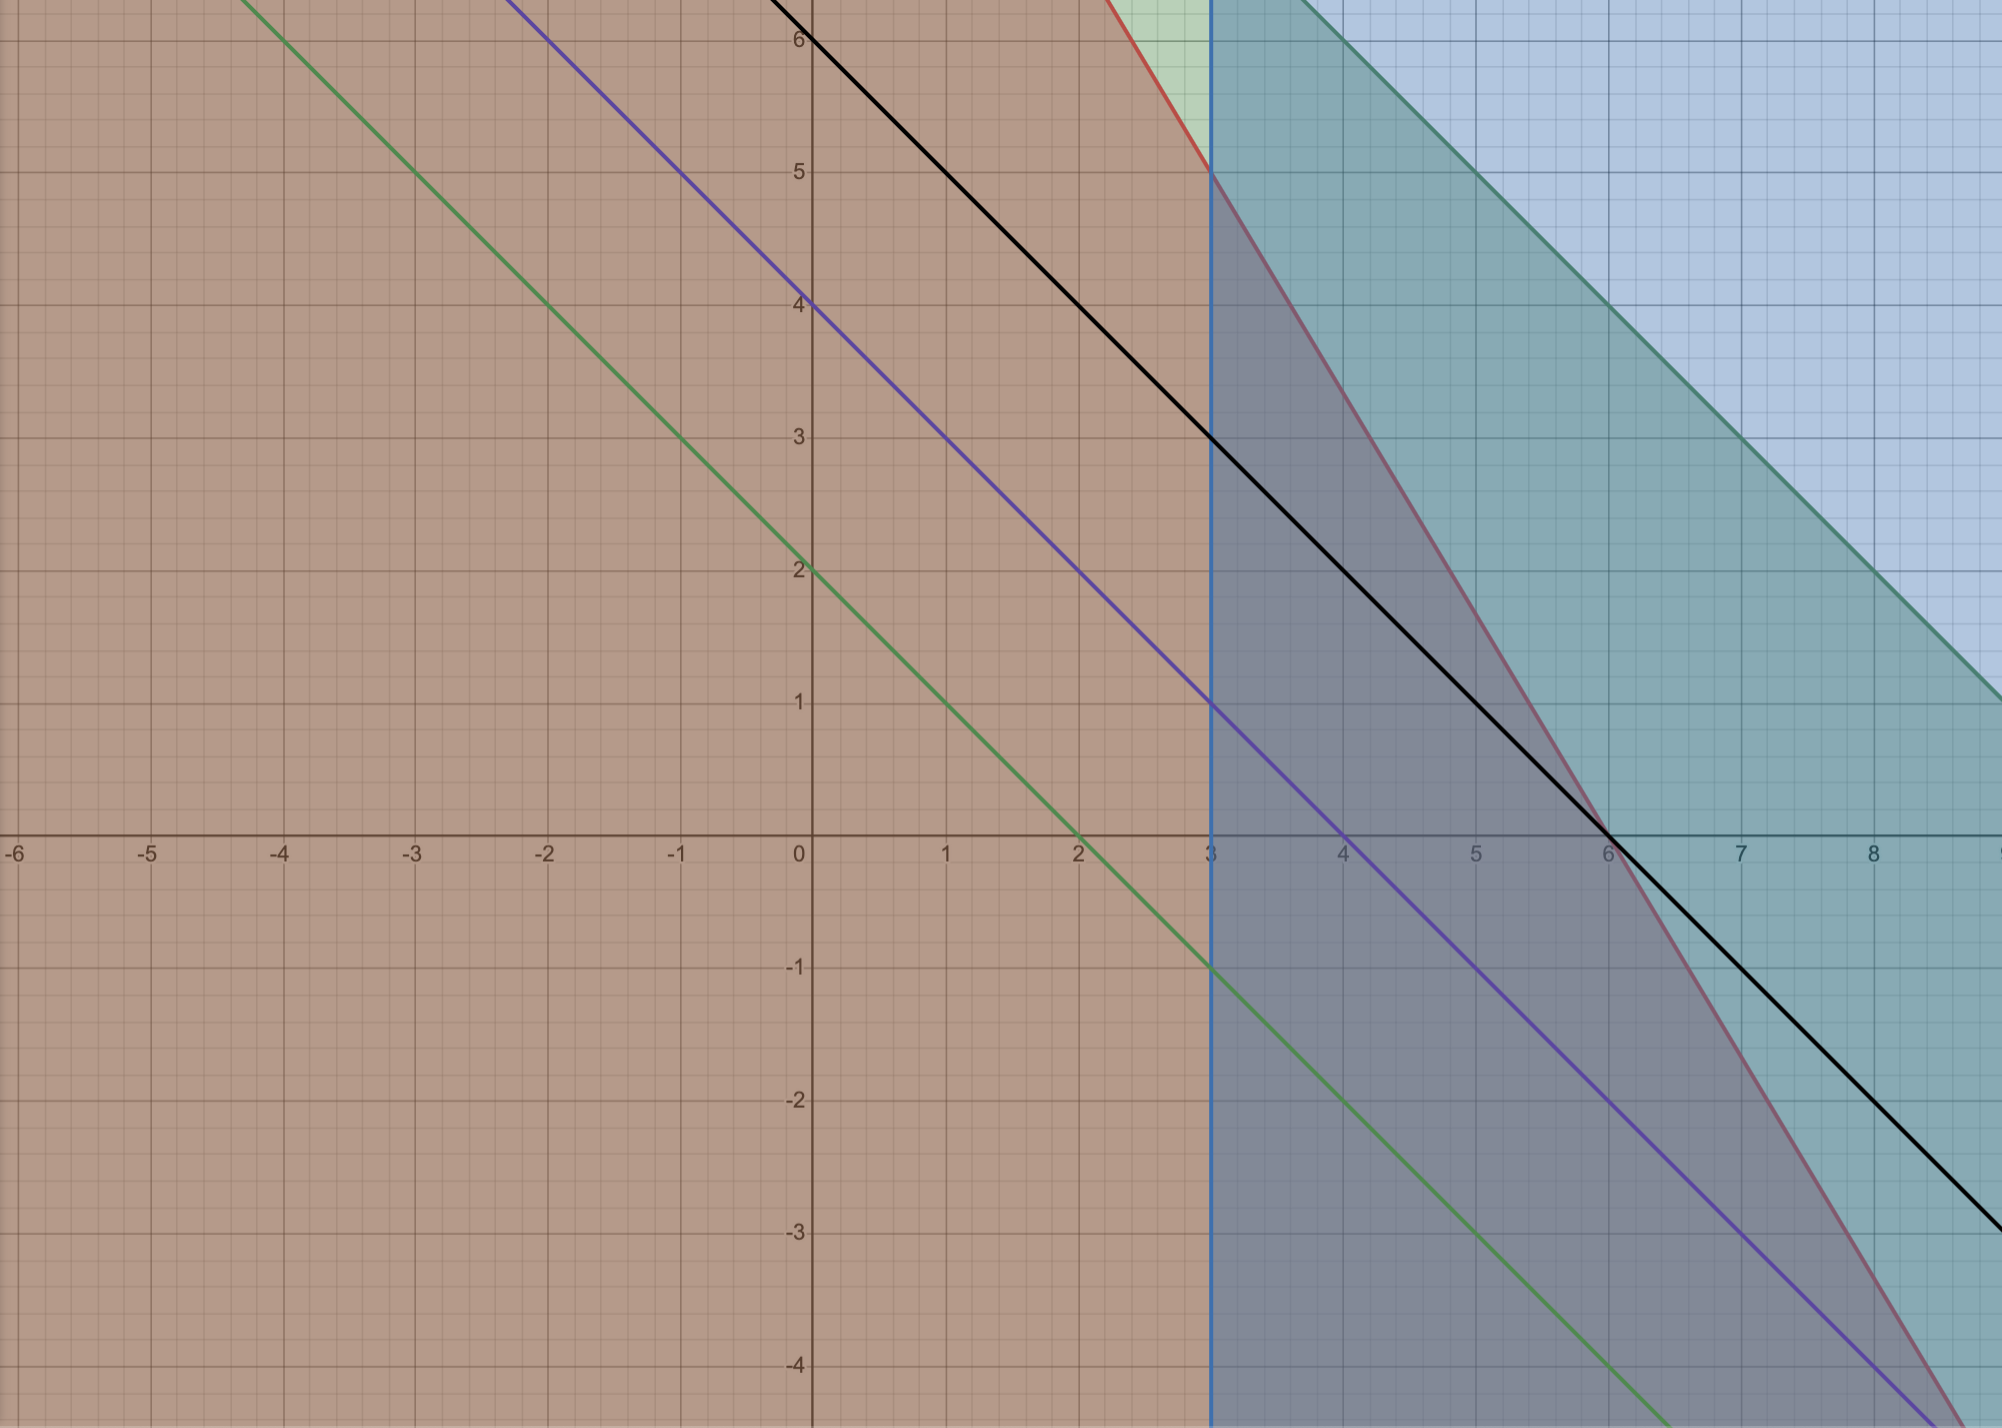

# Problem 3

### Part (a) Formulating the linear model

#### Decision Variables:  \$x_{ij}\$ : Number of kegs of beer type i brewed at location j

#### Objective Function: Minimize total cost
#### Minimize the total cost \( Z \) defined as:
#### \$ Z = \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} x_{ij} \$

#### where \$ c_{ij} $ is the cost of producing one keg of beer type i at location j.

#### Constraints:
#### 1. Fermentation Time Constraint for each location:
#### \$ \sum_{i=1}^{n} t_{i} x_{ij} <= T_{j}   \forall j \$

#### where \$ t_{i} \$ is the time required to brew one keg of beer type i, and \$ T_{j} \$ is the total available fermentation time at location j
#### 2. Minimum Production Requirement for each beer type:
#### \$ \sum_{j = 1}^{m} x_{ij} >= M_{i}  \forall i\$
#### where \$ M_{i} \$ is the minimum number of kegs required for beer type i
#### Non-negativity Constraint:
#### \$ x_{ij} >= 0  \forall i,j \$

### Part (b) Implementation of the model

In [4]:
#You might need to run "Pkg.add(...)" before using these packages
using DataFrames, CSV, NamedArrays, JuMP

#Load the data file
df = CSV.read("brewery_data.csv",DataFrame,delim=',');

# create a list of beers
beers = convert(Array,df[1:end,1])

# create a list of locations
locs = 1:5

# create a dictionary of the total time it takes to brew each type of beer
time_to_brew = Dict(zip(beers,df[1:end,2]))

# create a dictionary of the minimum kegs required for each beer
min_req = Dict(zip(beers,df[1:end,3]))
brew_cost_matrix = Matrix(df[1:end,4:end])

# rows are roasting methods, columns are flavors
brew_cost_array = NamedArray(brew_cost_matrix, (beers, locs),("beers","locs"));

df

Row,Beer,Time (hrs),Min required,Cost/keg 1,Cost/keg 2,Cost/keg 3,Cost/keg 4,Cost/keg 5
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,26,575,16,7,16,9,12
2,2,19,605,16,17,5,19,9
3,3,17,542,12,14,11,7,5
4,4,23,683,14,5,11,5,12
5,5,19,583,12,13,9,18,19
6,6,18,532,16,16,14,7,6
7,7,17,540,16,10,13,6,9
8,8,23,541,7,9,20,13,8
9,9,18,722,11,14,10,17,20


In [8]:
using JuMP, Cbc

m = Model(Cbc.Optimizer) 

@variable(m, x[beers, locs] >= 0)

@objective(m, Min, sum(brew_cost_array[b, l] * x[b, l] for b in beers, l in locs))

# time constraint
for l in locs
    @constraint(m, sum(time_to_brew[b] * x[b, l] for b in beers) <= 70000)  # Assumed total hours available, adjust as needed
end

# minimum production constraint
for b in beers
    @constraint(m, sum(x[b, l] for l in locs) >= min_req[b])
end

optimize!(m)

if termination_status(m) == MOI.OPTIMAL
    println("Optimal total cost: \$", objective_value(m))
    for b in beers
        for l in locs
            println("Kegs of beer type ", b, " at location ", l, ": ", value(x[b, l]))
        end
    end
else
    println("No optimal solution found.")
end

Optimal total cost: $114881.20555555554
Kegs of beer type 1 at location 1: 0.0
Kegs of beer type 1 at location 2: 575.0
Kegs of beer type 1 at location 3: 0.0
Kegs of beer type 1 at location 4: 0.0
Kegs of beer type 1 at location 5: 0.0
Kegs of beer type 2 at location 1: 0.0
Kegs of beer type 2 at location 2: 0.0
Kegs of beer type 2 at location 3: 605.0
Kegs of beer type 2 at location 4: 0.0
Kegs of beer type 2 at location 5: 0.0
Kegs of beer type 3 at location 1: 0.0
Kegs of beer type 3 at location 2: 0.0
Kegs of beer type 3 at location 3: 0.0
Kegs of beer type 3 at location 4: 0.0
Kegs of beer type 3 at location 5: 542.0
Kegs of beer type 4 at location 1: 0.0
Kegs of beer type 4 at location 2: 0.0
Kegs of beer type 4 at location 3: 0.0
Kegs of beer type 4 at location 4: 683.0
Kegs of beer type 4 at location 5: 0.0
Kegs of beer type 5 at location 1: 0.0
Kegs of beer type 5 at location 2: 0.0
Kegs of beer type 5 at location 3: 583.0
Kegs of beer type 5 at location 4: 0.0
Kegs of beer t

# Problem 4

### Part (a) Convert to Standard Form

#### Original Problem:
#### Objective: Minimize \$ 3 x_{1} + 2 x_{2} + x_{3} + 4 x_{4} \$
#### Constraints: 
#### \$ x_{1} + x_{2} - x_{3} + x_{4}  >= 5 \$
#### \$ 2 x_{1} - 4 x_{2} + 3 x_{3} + x_{4}  = 10 \$
#### \$ - x_{1} + 2 x_{2} + x_{4}  <= 8 \$
#### \$ x_{2} + x_{4}  >= -3 \$
#### Variable bounds:
#### \$ x_{1}, x_{3} >= 0 \$
#### \$ x_{2}, x_{4} \$ unrestricted in sign

#### Converting to Standard Form:
#### 1. Objective: Already in the correct form of minimization
#### 2. Convert inequality constraints: 
#### \$ x_{1} + x_{2} - x_{3} + x_{4} - s_{1} = 5 \$ (added a slack variable \$ s_{1} >= 0 \$)
#### \$ - x_{1} + 2 x_{2} + x_{4} + s_{2} = 8 \$ (added a slack variable \$ s_{2} >= 0 \$)
#### \$ x_{2} + x_{4} - s_{3} = -3 \$ (added slack variable \$ s_{3} >= 0 \$)
#### 3. Handle Free Variables:
#### Replace \$ x_{2} \$ and \$ x_{4} \$ with its upper bound - lower bound value

### Part (b) Define A,b,c and x

#### Matrix A represents the coefficients of the decision variables in the constraint equations of the LP.
#### Vector b contains the right-hand side values of the constraints after they are transformed into equalities (by adding slack variables or adjusting the equations).
#### Vector c holds the coefficients of the decision variables in the objective function.
#### Decision variable vector x represents all the variables being optimized, including original, slack, and auxiliary variables for unrestricted signs.

#### Relation of Transformed Decision Variables to Original LP
#### 1. \$ x_{1}, x_{3} \$ These remain the same in both the original and transformed LP, both are non-negative.
#### 2. \$ x_{2}, x_{4} \$ These are split into positive and negative components to handle their unrestricted nature. The original corresponds to the difference between the upper and lower bounds
#### 3. Slack variables: (\$ s_{1}, s_{2}, s_{3} \$) These are introduced to convert inequalities into equalities and do not exist in the original LP.

### Part (c) Solve the LP

In [9]:
using JuMP, Cbc

m = Model(Cbc.Optimizer)

@variable(m, x1 >= 0)
@variable(m, x2_plus >= 0)
@variable(m, x2_minus >= 0)
@variable(m, x3 >= 0)
@variable(m, x4_plus >= 0)
@variable(m, x4_minus >= 0)
@variable(m, s1 >= 0)
@variable(m, s2 >= 0)
@variable(m, s3 >= 0)

@objective(m, Min, 3x1 + 2(x2_plus - x2_minus) + x3 + 4(x4_plus - x4_minus))

@constraint(m, x1 + (x2_plus - x2_minus) - x3 + (x4_plus - x4_minus) - s1 == 5)
@constraint(m, 2x1 - 4(x2_plus - x2_minus) + 3x3 + (x4_plus - x4_minus) == 10)
@constraint(m, -x1 + 2(x2_plus - x2_minus) + (x4_plus - x4_minus) + s2 == 8)
@constraint(m, (x2_plus - x2_minus) + (x4_plus - x4_minus) - s3 == -3)

optimize!(m)

println("Optimal objective value: ", objective_value(m))
println("Optimal values for decision variables:")
println("x1 = ", value(x1))
println("x2 = ", value(x2_plus) - value(x2_minus))
println("x3 = ", value(x3))
println("x4 = ", value(x4_plus) - value(x4_minus))

Optimal objective value: 10.799995422363281
Optimal values for decision variables:
x1 = 8.0
x2 = 0.6000000000000001
x3 = 0.0
x4 = -3.6000003814697266
Presolve 4 (0) rows, 6 (-3) columns and 21 (-3) elements
0  Obj 0 Primal inf 7.499998 (2) Dual inf 5.999998 (2)
3  Obj 10.799995
Optimal - objective value 10.799995
After Postsolve, objective 10.799995, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 10.79999542 - 3 iterations time 0.002, Presolve 0.00
